## Rain in Australia Classification



    1 - Cleaning 
    2 - Baselining
    3 - Data Splitting 
    4 - Encoding 
    5 - Feature Scaling
    6 - Logistic Regression 
    7 - KNN
    8 - Naive Bayes
    9 - Decission Tree
    10 - Random Forest
    11 - Ensembling
    11 - Grid search

## Import the Main Modules to be Used

In [281]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [213]:
df = pd.read_csv('weatherAUS.csv')

In [214]:
df.shape

(145460, 23)

In [215]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [216]:
df.sample(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
128873,2014-11-04,Walpole,7.8,22.2,0.0,NaN,NaN,WSW,30.0,NW,...,68.0,64.0,1024.0,1021.4,NaN,NaN,17.0,18.4,No,No
50732,2013-11-04,Tuggeranong,1.2,18.3,0.0,NaN,NaN,SSE,39.0,S,...,39.0,28.0,1022.3,1021.7,NaN,NaN,9.9,17.5,No,No
129678,2017-01-17,Walpole,12.0,20.6,0.0,NaN,NaN,SSE,39.0,SE,...,53.0,51.0,1017.9,1017.3,NaN,NaN,17.5,19.2,No,No
63691,2016-02-12,Sale,13.9,25.7,0.0,NaN,NaN,E,31.0,WNW,...,82.0,59.0,1017.6,1014.1,1.0,1.0,18.4,25.0,No,No
71352,2011-09-17,Mildura,7.9,33.2,0.0,2.6,10.6,NNW,50.0,N,...,14.0,3.0,1012.7,1008.2,4.0,1.0,21.5,32.4,No,No
307,2009-10-04,Albury,9.6,16.2,1.8,NaN,NaN,NNE,20.0,NaN,...,85.0,75.0,1020.6,1019.4,NaN,1.0,12.6,14.8,Yes,No
15726,2010-09-12,Newcastle,6.2,22.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,14.3,NaN,No,No
69615,2015-05-10,Melbourne,NaN,NaN,NaN,5.4,2.8,WSW,61.0,NNE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89255,2014-10-15,Cairns,19.0,32.5,0.0,6.2,11.6,ESE,37.0,SSE,...,41.0,23.0,1015.4,1011.7,1.0,6.0,29.0,30.2,No,No
99453,2017-04-27,Adelaide,9.6,18.0,0.0,NaN,NaN,SSW,30.0,E,...,75.0,59.0,1029.3,1027.2,NaN,NaN,12.1,15.8,No,Yes


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Data Cleaning

- Check duplicates.
- Check null.

In [218]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [219]:
#df.dropna(how='all')
df.dropna(inplace=True)

In [220]:
df.sample(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
65962,2014-02-04,MelbourneAirport,13.7,25.0,0.6,7.6,12.0,SE,59.0,SSE,...,55.0,44.0,1022.2,1019.9,3.0,1.0,17.8,22.9,No,No
65669,2013-04-17,MelbourneAirport,8.5,17.6,0.0,4.0,1.8,S,33.0,W,...,70.0,62.0,1018.1,1016.4,7.0,7.0,13.5,16.6,No,Yes
95765,2015-12-19,Townsville,25.2,32.4,0.0,12.6,10.8,ENE,48.0,SE,...,53.0,54.0,1013.0,1010.0,7.0,2.0,29.2,30.2,No,No
64799,2010-09-01,MelbourneAirport,10.0,12.1,4.4,1.0,0.0,N,54.0,N,...,95.0,85.0,1014.5,1014.6,8.0,8.0,11.0,11.9,Yes,Yes
12840,2011-02-13,Moree,22.6,36.2,0.0,9.8,11.0,SW,69.0,NNE,...,54.0,30.0,1014.6,1011.4,1.0,2.0,26.5,34.0,No,Yes
118891,2012-07-16,PerthAirport,9.6,16.5,0.8,1.2,2.4,SSW,33.0,N,...,88.0,73.0,1021.6,1019.9,2.0,7.0,13.2,16.5,No,Yes
120236,2016-05-20,PerthAirport,8.6,22.0,0.0,2.8,8.5,NW,31.0,NE,...,74.0,53.0,1013.0,1008.2,1.0,5.0,15.9,21.3,No,Yes
68159,2011-02-15,Melbourne,16.6,30.3,0.0,4.2,11.1,N,44.0,N,...,72.0,38.0,1021.7,1018.0,3.0,7.0,20.8,29.2,No,No
122200,2012-11-09,Perth,11.2,31.5,0.0,7.4,13.0,NE,31.0,NNE,...,27.0,32.0,1017.1,1014.2,1.0,6.0,26.4,27.6,No,No
95424,2015-01-12,Townsville,25.3,31.6,0.0,9.6,12.0,NE,37.0,ESE,...,62.0,64.0,1006.9,1004.1,3.0,7.0,30.1,30.3,No,No


In [221]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [222]:
df.shape

(56420, 23)

In [223]:
df['WindGustDir'].value_counts()

E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     3930
SSW    3898
WSW    3791
S      3636
ESE    3312
SSE    3295
NE     3185
WNW    2989
NW     2612
NNE    2516
NNW    2289
Name: WindGustDir, dtype: int64

In [224]:
df['Location'].value_counts()

Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: Location, dtype: int64

In [225]:
df.duplicated().sum()

0

In [226]:
df.drop('Date', axis=1, inplace=True)

In [227]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.749687,0.110800,0.506764,0.076087,0.118054,0.108522,0.137273,-0.174991,0.070827,-0.475661,-0.495577,0.106177,0.042173,0.906295,0.727222
MaxTemp,0.749687,1.000000,-0.069981,0.650964,0.463913,0.035531,-0.008171,0.012266,-0.495781,-0.448116,-0.350980,-0.451691,-0.263634,-0.257752,0.893387,0.984841
Rainfall,0.110800,-0.069981,1.000000,-0.077239,-0.246379,0.106308,0.050584,0.044112,0.263625,0.277625,-0.180606,-0.137302,0.217169,0.191433,0.013713,-0.074627
Evaporation,0.506764,0.650964,-0.077239,1.000000,0.369250,0.209566,0.193154,0.124345,-0.554232,-0.422436,-0.297319,-0.325954,-0.199809,-0.202366,0.593122,0.630727
Sunshine,0.076087,0.463913,-0.246379,0.369250,1.000000,-0.052422,-0.013842,0.029200,-0.500343,-0.629299,0.043330,-0.020632,-0.677939,-0.702022,0.289038,0.486129
WindGustSpeed,0.118054,0.035531,0.106308,0.209566,-0.052422,1.000000,0.608852,0.685236,-0.193410,-0.042653,-0.430363,-0.383683,0.088129,0.131590,0.085520,-0.000382
WindSpeed9am,0.108522,-0.008171,0.050584,0.193154,-0.013842,0.608852,1.000000,0.502226,-0.236795,-0.058449,-0.201518,-0.155484,0.034908,0.062507,0.053749,-0.018357
WindSpeed3pm,0.137273,0.012266,0.044112,0.124345,0.029200,0.685236,0.502226,1.000000,-0.100626,0.031843,-0.293155,-0.252095,0.068224,0.041475,0.114043,-0.009436
Humidity9am,-0.174991,-0.495781,0.263625,-0.554232,-0.500343,-0.193410,-0.236795,-0.100626,1.000000,0.685697,0.114575,0.172972,0.438962,0.348707,-0.423598,-0.487758
Humidity3pm,0.070827,-0.448116,0.277625,-0.422436,-0.629299,-0.042653,-0.058449,0.031843,0.685697,1.000000,-0.063454,0.024109,0.509223,0.510996,-0.151614,-0.497245


<function matplotlib.pyplot.show(close=None, block=None)>

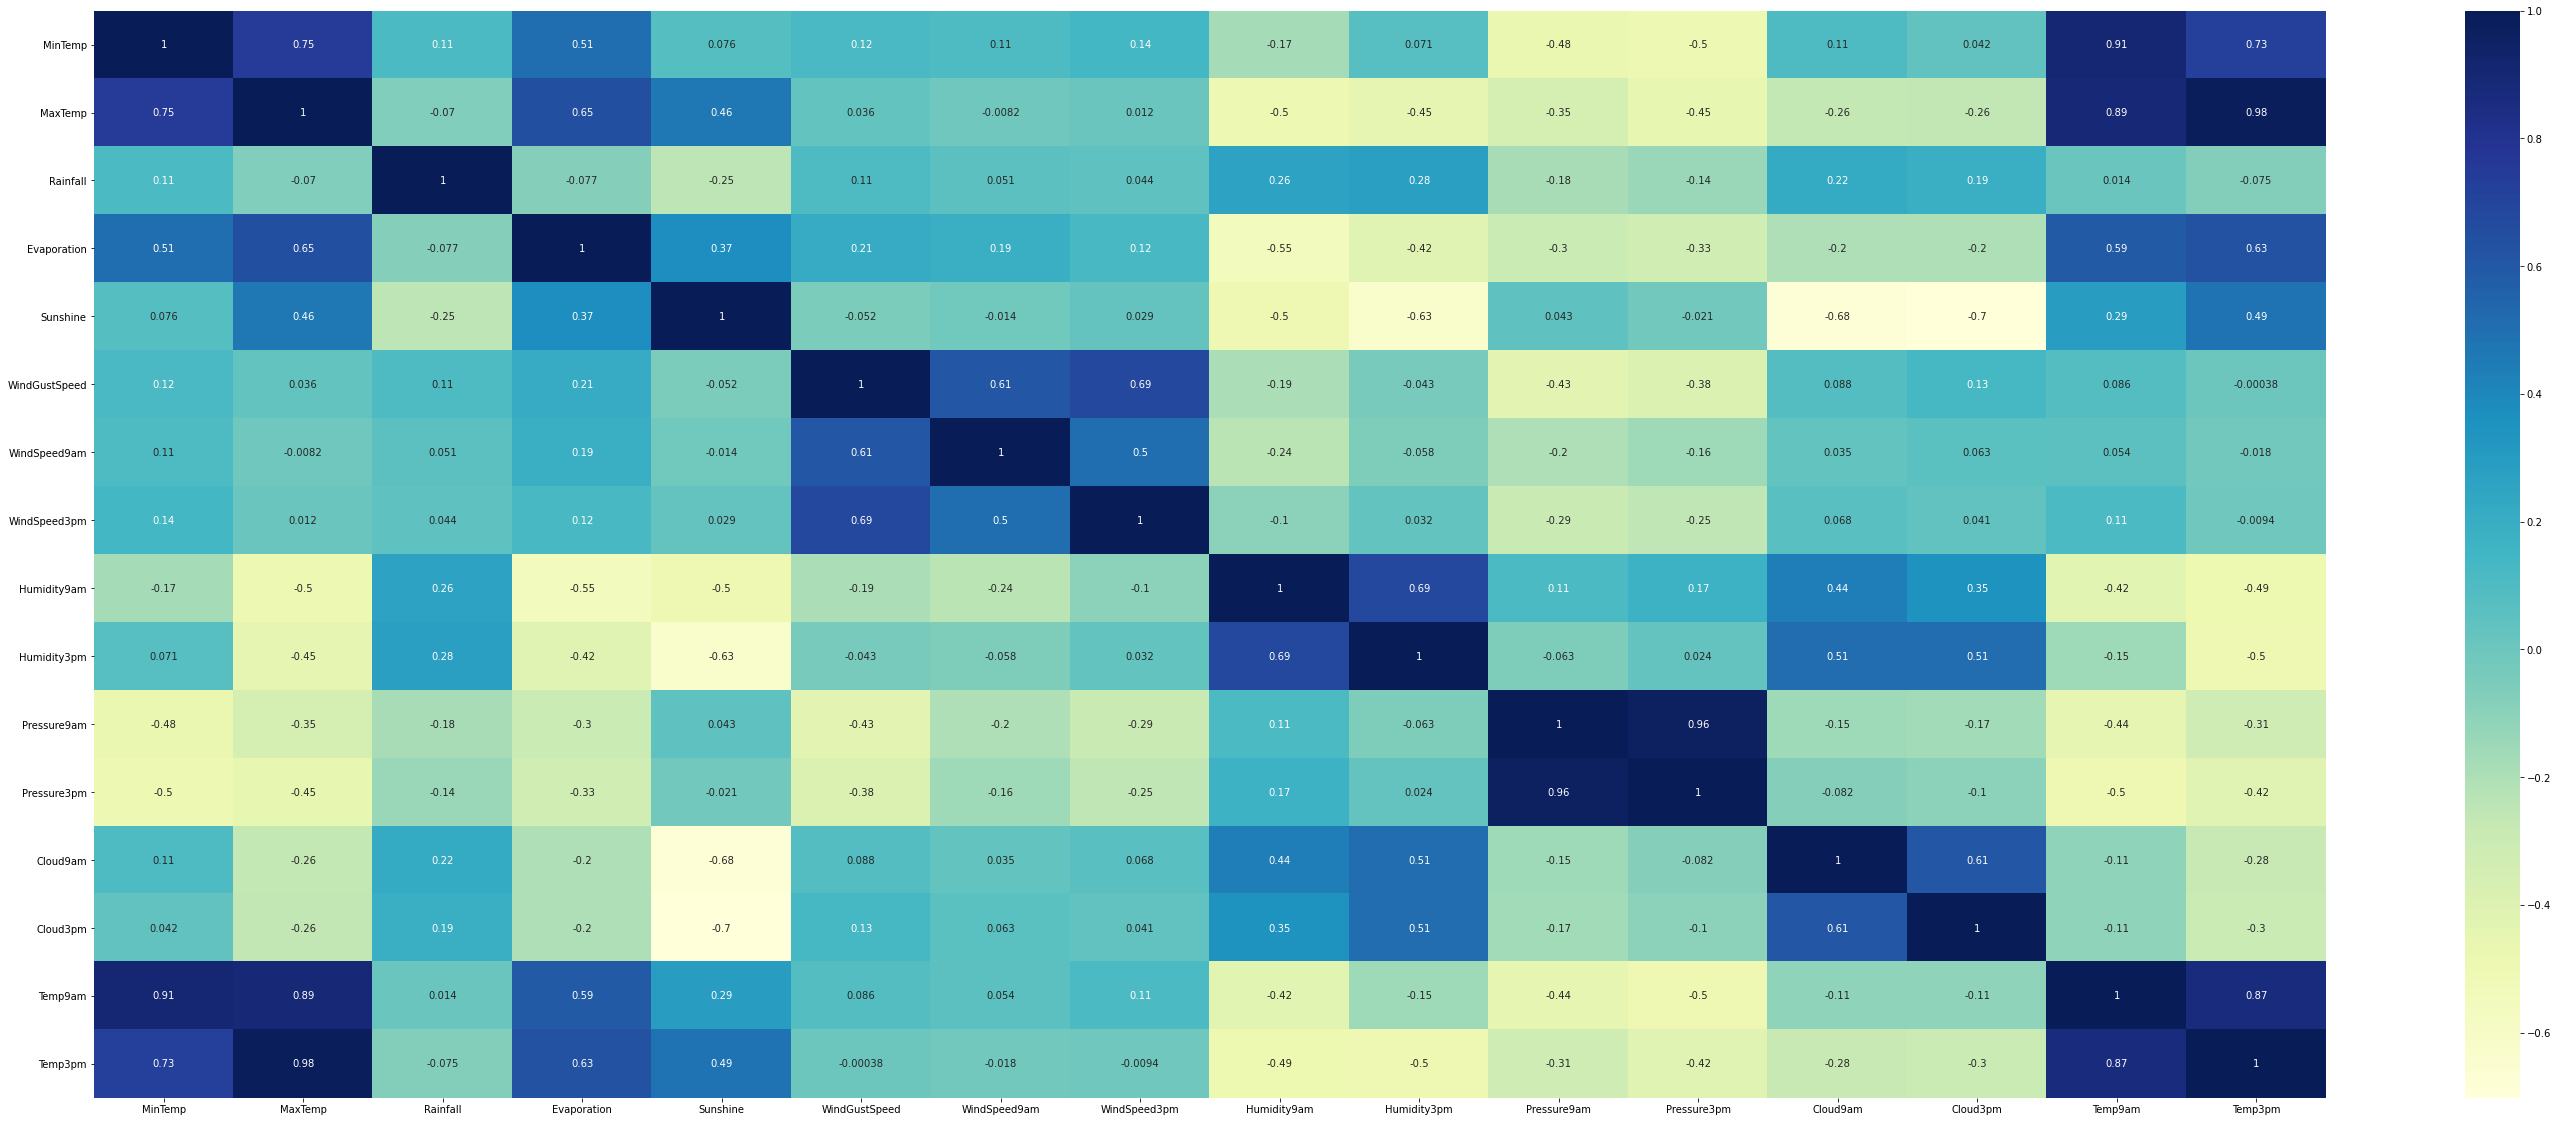

In [228]:
plt.figure(figsize=(50,20))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show

In [263]:
top_Location = df.groupby(['Location']).max().sort_values('MaxTemp',ascending=False).sample(10)
top_Location.reset_index(inplace=True)
top_Location

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Townsville,28.6,38.3,95.2,14.8,12.8,WSW,81.0,WSW,WSW,...,99.0,98.0,1026.1,1023.3,8.0,8.0,33.2,37.4,Yes,Yes
1,Watsonia,28.1,46.7,84.0,23.8,13.9,WSW,96.0,WSW,WSW,...,100.0,100.0,1039.2,1035.8,8.0,8.0,36.4,45.2,Yes,Yes
2,Sydney,27.1,45.8,94.4,18.4,13.6,WSW,96.0,WSW,WSW,...,100.0,95.0,1039.0,1036.0,8.0,8.0,36.5,44.7,Yes,Yes
3,Woomera,31.4,48.1,53.8,81.2,14.2,WSW,115.0,WSW,WSW,...,100.0,99.0,1038.6,1035.9,8.0,9.0,37.9,46.1,Yes,Yes
4,CoffsHarbour,25.2,37.7,128.0,10.0,13.8,WSW,98.0,WSW,WSW,...,97.0,99.0,1034.3,1032.0,8.0,8.0,30.6,37.4,Yes,Yes
5,Cairns,28.4,38.6,206.2,22.0,12.8,WSW,81.0,WSW,WSW,...,100.0,100.0,1022.3,1019.6,8.0,8.0,33.5,38.0,Yes,Yes
6,PerthAirport,28.6,44.2,76.6,17.0,13.9,WSW,107.0,WSW,WSW,...,99.0,97.0,1038.7,1034.2,8.0,8.0,39.4,42.4,Yes,Yes
7,Perth,29.7,44.4,114.4,17.0,13.9,WSW,83.0,WSW,WSW,...,99.0,97.0,1038.8,1034.3,8.0,8.0,39.0,42.5,Yes,Yes
8,Williamtown,26.9,42.9,57.8,37.0,13.6,WSW,102.0,WSW,WSW,...,100.0,98.0,1036.6,1034.7,8.0,8.0,34.3,41.9,Yes,Yes
9,NorfolkIsland,24.3,28.4,67.0,15.0,13.3,WSW,98.0,WSW,WSW,...,99.0,98.0,1033.0,1030.6,8.0,8.0,25.9,27.6,Yes,Yes


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

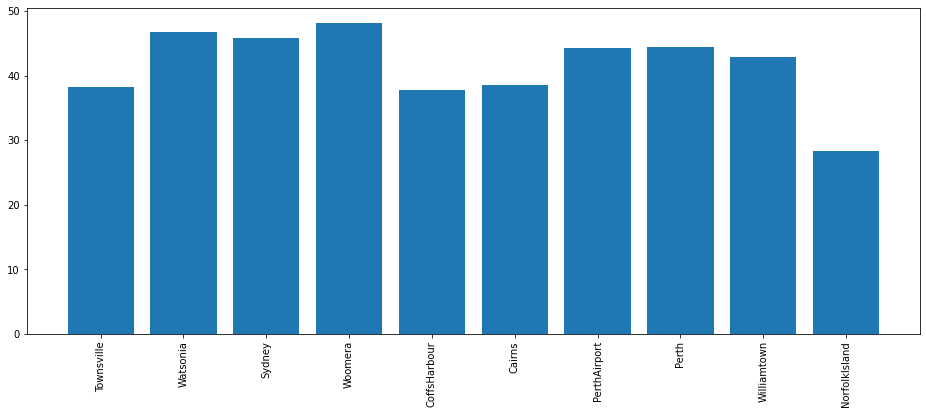

In [264]:
plt.figure(figsize=(16,6))
plt.bar(top_Location['Location'],top_Location['MaxTemp'])
plt.xticks(rotation='vertical')

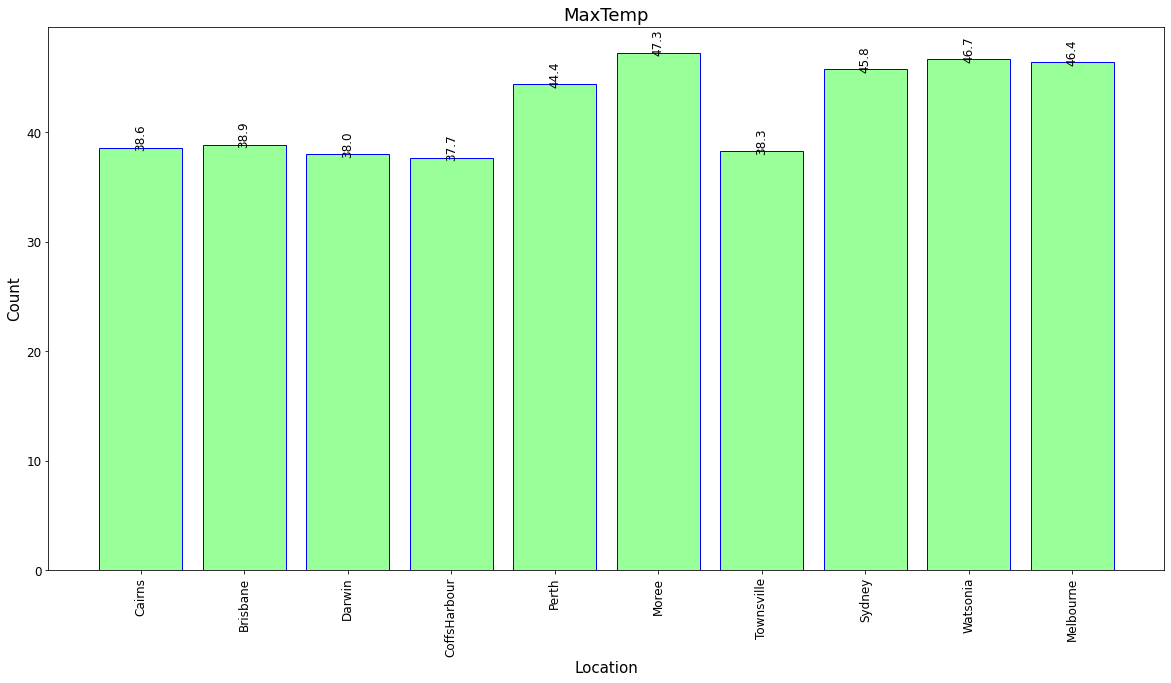

In [274]:
plt.figure(figsize = (20,10)) 
plt.title("MaxTemp", fontsize=18) 
plt.bar(top_Location["Location"], top_Location["MaxTemp"],color= '#99ff99',edgecolor='blue', linewidth = 1)
plt.xlabel("Location",fontsize=15) 
plt.ylabel("Count",fontsize=15) 
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in top_Location["MaxTemp"].items(): 
    if v > 800 : 
       plt.text(k,v-300,str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v,str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Cobar'),
  Text(1, 0, 'CoffsHarbour'),
  Text(2, 0, 'Moree'),
  Text(3, 0, 'NorfolkIsland'),
  Text(4, 0, 'Sydney'),
  Text(5, 0, 'SydneyAirport'),
  Text(6, 0, 'WaggaWagga'),
  Text(7, 0, 'Williamtown'),
  Text(8, 0, 'Canberra'),
  Text(9, 0, 'Sale'),
  Text(10, 0, 'MelbourneAirport'),
  Text(11, 0, 'Melbourne'),
  Text(12, 0, 'Mildura'),
  Text(13, 0, 'Portland'),
  Text(14, 0, 'Watsonia'),
  Text(15, 0, 'Brisbane'),
  Text(16, 0, 'Cairns'),
  Text(17, 0, 'Townsville'),
  Text(18, 0, 'MountGambier'),
  Text(19, 0, 'Nuriootpa'),
  Text(20, 0, 'Woomera'),
  Text(21, 0, 'PerthAirport'),
  Text(22, 0, 'Perth'),
  Text(23, 0, 'Hobart'),
  Text(24, 0, 'AliceSprings'),
  Text(25, 0, 'Darwin')])

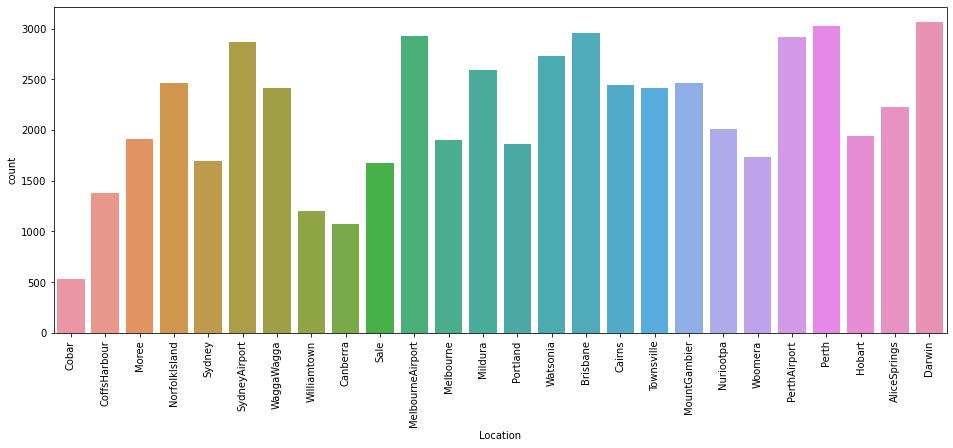

In [271]:
plt.figure(figsize=(16,6))
sns.countplot('Location',data=df)

plt.xticks(rotation='vertical')


In [272]:
top_Location = df.groupby(['Location']).max().sort_values('Rainfall',ascending=False).head(10)
top_Location.reset_index(inplace=True)
top_Location

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Cairns,28.4,38.6,206.2,22.0,12.8,WSW,81.0,WSW,WSW,...,100.0,100.0,1022.3,1019.6,8.0,8.0,33.5,38.0,Yes,Yes
1,Brisbane,28.0,38.9,182.6,44.0,13.5,WSW,93.0,WSW,WSW,...,98.0,98.0,1033.9,1031.5,8.0,8.0,34.4,36.3,Yes,Yes
2,Darwin,29.7,38.0,132.6,16.8,12.3,WSW,102.0,WSW,WSW,...,99.0,99.0,1019.3,1015.4,8.0,8.0,32.2,37.4,Yes,Yes
3,CoffsHarbour,25.2,37.7,128.0,10.0,13.8,WSW,98.0,WSW,WSW,...,97.0,99.0,1034.3,1032.0,8.0,8.0,30.6,37.4,Yes,Yes
4,Perth,29.7,44.4,114.4,17.0,13.9,WSW,83.0,WSW,WSW,...,99.0,97.0,1038.8,1034.3,8.0,8.0,39.0,42.5,Yes,Yes
5,Moree,28.3,47.3,113.0,65.4,14.0,WSW,117.0,WSW,WSW,...,100.0,99.0,1034.1,1030.3,8.0,8.0,34.1,45.8,Yes,Yes
6,Townsville,28.6,38.3,95.2,14.8,12.8,WSW,81.0,WSW,WSW,...,99.0,98.0,1026.1,1023.3,8.0,8.0,33.2,37.4,Yes,Yes
7,Sydney,27.1,45.8,94.4,18.4,13.6,WSW,96.0,WSW,WSW,...,100.0,95.0,1039.0,1036.0,8.0,8.0,36.5,44.7,Yes,Yes
8,Watsonia,28.1,46.7,84.0,23.8,13.9,WSW,96.0,WSW,WSW,...,100.0,100.0,1039.2,1035.8,8.0,8.0,36.4,45.2,Yes,Yes
9,Melbourne,28.0,46.4,82.2,20.4,13.9,WSW,104.0,WSW,WSW,...,100.0,98.0,1039.0,1035.8,8.0,8.0,35.5,45.4,Yes,Yes


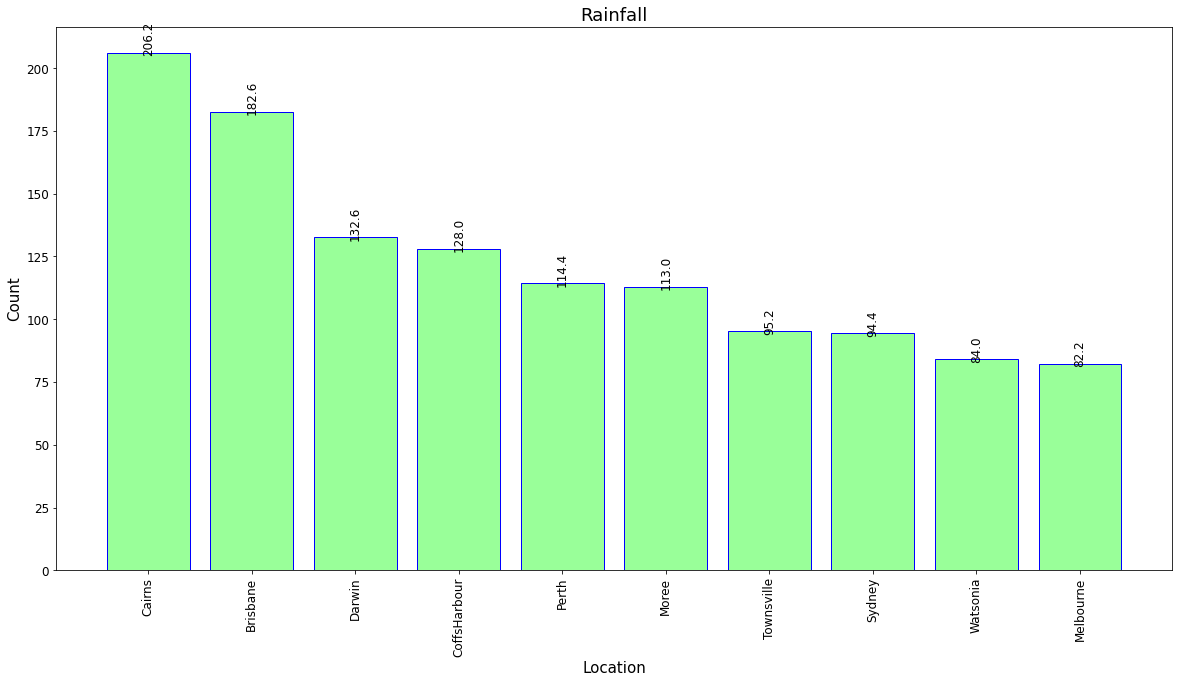

In [275]:
plt.figure(figsize = (20,10)) 
plt.title("Rainfall", fontsize=18) 
plt.bar(top_Location["Location"], top_Location["Rainfall"],color= '#99ff99',edgecolor='blue', linewidth = 1)
plt.xlabel("Location",fontsize=15) 
plt.ylabel("Count",fontsize=15) 
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in top_Location["Rainfall"].items(): 
    if v > 800 : 
       plt.text(k,v-300,str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v,str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

### Get Dummies

In [276]:
df['RainToday'].replace(to_replace=['Yes', 'No'],value=[1,2], inplace=True)
df['RainTomorrow'].replace(to_replace=['Yes', 'No'],value=[1,2], inplace=True)

In [277]:
df = pd.get_dummies(df, prefix=None,drop_first=True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0,0,0,0,0,0,1,0,0,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0,0,0,0,1,0,0,0,0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,1,0,0,0,0,0,0,0,0,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,0,0,1
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,0,0,0,0,1,0


------
## Build Model

In [278]:
## split dataset

X = df.drop('RainTomorrow',axis=1)
y = df[['RainTomorrow']]

In [279]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=42)

In [282]:
# Basline 
from sklearn.metrics import accuracy_score 
guess = statistics.mode(y_train)
y_pred_base = [guess]* len(y_test)
y_pred_base

# gete the score 
score = accuracy_score(y_test,y_pred_base)
score

NameError: name 'statistics' is not defined

In [283]:
# Cross Validation 
from sklearn.model_selection import KFold , cross_val_score

cv = KFold(n_splits=5 , random_state=1 , shuffle=True)

In [ ]:
# beasline Modeling

from sklearn.linear_model import LogisticRegression

lr =LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

In [ ]:
# for cleaning the the trian set form the outliers and explorat the data we will concat the x_train and y_train

train = pd.concat([x_train, y_train],axis=1)

In [ ]:
train.describe()

In [ ]:
target_pcts = train.RainTomorrow.value_counts(normalize=True)  
print(target_pcts)

target_pcts.plot(kind='bar')

In [ ]:
 sns.distplot(df['Rainfall'])

In [ ]:
q = df['Rainfall'].quantile(0.99)
df = df[df['Rainfall']<q]

In [ ]:
 sns.distplot(df['Rainfall'])

-------
### Feature Engineering

----
### Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

scor = cross_val_score(log_model,X_train,y_train,cv=cv)
scor.mean()

# log_model.fit(X_train , y_train)